Wall time: ?

In [1]:
NOTEBOOK_NAME = "mb-solve-lambda-weak-pulse-cloud-atoms-some-coupling-store-decay"

In [2]:
mb_solve_json = """
{
  "ob_atom": {
    "decays": [
      { "channels": [[0,1], [1,2]], 
        "rate": 1.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 1.0e-3,
        "rabi_freq_t_args": 
          {
             "ampl_1": 1.0,
             "centre_1": 0.0,
             "fwhm_1": 1.0
          },
        "rabi_freq_t_func": "gaussian_1"
      },
      {
        "coupled_levels": [[1, 2]],
        "detuning": 0.0,
        "detuning_positive": false,
        "label": "coupling",
        "rabi_freq": 5.0,
        "rabi_freq_t_args": 
        {
          "ampl_2": 1.0,
          "fwhm_2": 0.2,
          "off_2": 4.0, 
          "on_2": 6.0
          },
        "rabi_freq_t_func": "ramp_offon_2"
      }
    ],
    "num_states": 3
  },
  "t_min": -2.0,
  "t_max": 12.0,
  "t_steps": 140,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 140,
  "z_steps_inner": 50,
  "num_density_z_func": "gaussian_1",
  "num_density_z_args": {
    "ampl_1": 1.0,
    "fwhm_1": 0.5,
    "centre_1": 0.5
  },
  "interaction_strengths": [1.0e3, 1.0e3],
  "velocity_classes": {
    "thermal_delta_min": -0.0,
    "thermal_delta_max": 0.0,
    "thermal_delta_steps": 0,
    "thermal_delta_inner_min": 0.0,
    "thermal_delta_inner_max": 0.0,
    "thermal_delta_inner_steps": 0,
    "thermal_width": 1.0
  },
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/%s" 
}
"""%(NOTEBOOK_NAME)

In [3]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

In [4]:
mb_solve_00.savefile

'qu/mb-solve-lambda-weak-pulse-cloud-atoms-some-coupling-store-decay'

In [5]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(recalc=False)

100%|██████████| 140/140 [2:17:34<00:00, 47.81s/it]


Saving MBSolve to qu/mb-solve-lambda-weak-pulse-cloud-atoms-some-coupling-store-decay .qu
CPU times: user 2h 5min 56s, sys: 39.8 s, total: 2h 6min 36s
Wall time: 2h 17min 36s


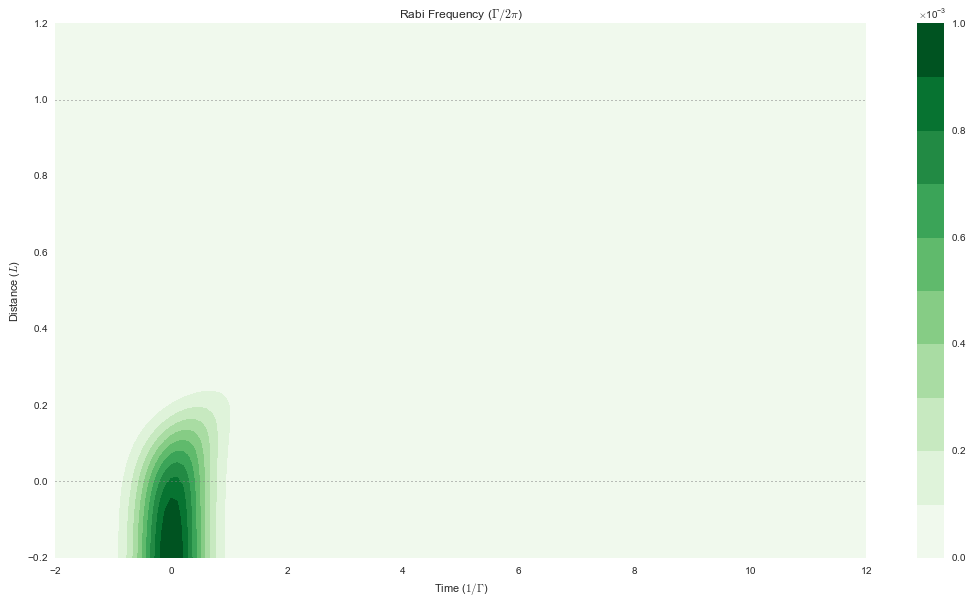

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

fig = plt.figure(1, figsize=(16, 9))
ax = fig.add_subplot(111)
#fig, ax = plt.subplots(figsize=(16, 9))
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Greens)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf)
plt.savefig('images/{0}.png'.format(NOTEBOOK_NAME))

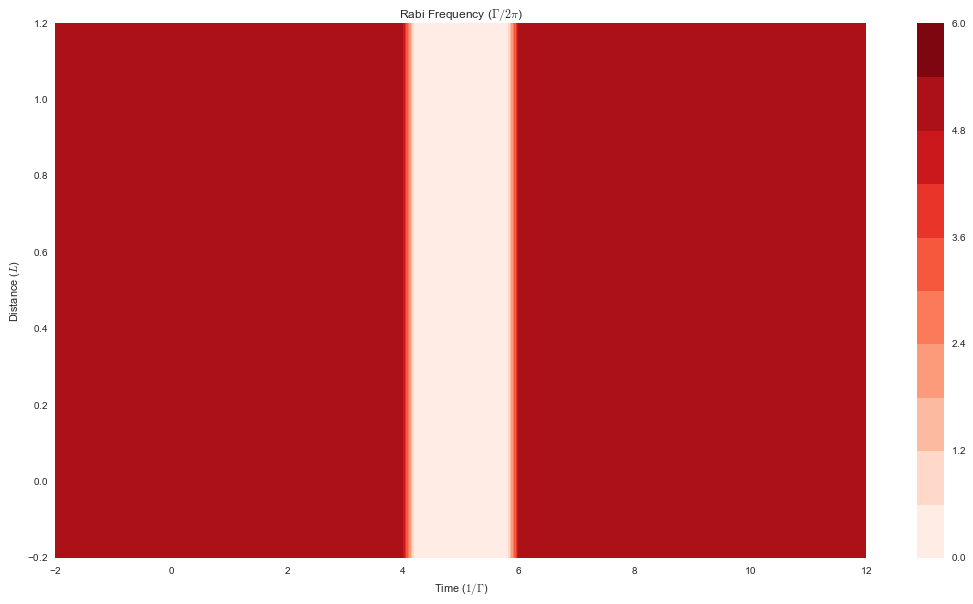

In [7]:
fig = plt.figure(1, figsize=(16, 9))
ax = fig.add_subplot(111)
#fig, ax = plt.subplots(figsize=(16, 9))
cmap_range = np.linspace(0.0, 6.0, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[1]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Reds)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
#for y in [0.0, 1.0]:
#    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf)